# 01PAO25-25 - Python, Data Types

![Instituto Superior Tecnológico Quito](img/Recurso-26.png)

**Nombre:** Germán Del Río  
**Fecha:** 09/07/2055

---


![Python Logo](img/python_logo.png)

[-- Enlace al Repositorio](https://github.com/Saquis/MachineLearning/tree/main/Deberes/)

In [3]:
import pandas as pd
import numpy as np


In [4]:
pd.__version__

'2.3.0'

# Operaciones en pandas

In [5]:
rand_matrix = np.random.randint(6,size=(2,3))
frame = pd.DataFrame(rand_matrix , columns=list('ABC'))
display(frame)

,A,B,C
0,4,1,4
1,0,0,3


In [6]:
# buscando columnas (DataFrame como dic, busca en claves)
'A' in frame

True

In [7]:
display(frame.isin([3,2])) # --> mask de respuesta (valores que son 3 o 2)

,A,B,C
0,False,False,False
1,False,False,True


In [8]:
# Contar el número de ocurrencias
print(frame.isin([4]).values.sum())
display(frame.isin([4])) #devuelve una mask con valores true si el elemento es 4
print(frame.isin([4]).values)
type(frame.isin([4]).values) # pandas es una capa alrededor de numpy

2


,A,B,C
0,True,False,True
1,False,False,False


[[ True False  True]
 [False False False]]


numpy.ndarray

In [9]:
# Cuántos valores son >= 2
mask = frame >= 2
print(mask.values.sum())
display(mask)

3


,A,B,C
0,True,False,True
1,False,False,True


In [10]:
from random import shuffle

rand_matrix = np.random.randint(20,size=(5,4))

indices = list(range(5))
shuffle(indices) # mezcla indices

frame = pd.DataFrame(rand_matrix , columns=list('DACB'), index=indices)
display(frame)

,D,A,C,B
4,18,16,14,15
0,16,10,16,4
3,1,2,12,3
2,11,12,19,15
1,13,8,3,0


In [11]:
# ordenar por índice
display(frame.sort_index(ascending=False))
display(frame)

,D,A,C,B
4,18,16,14,15
3,1,2,12,3
2,11,12,19,15
1,13,8,3,0
0,16,10,16,4


,D,A,C,B
4,18,16,14,15
0,16,10,16,4
3,1,2,12,3
2,11,12,19,15
1,13,8,3,0


In [12]:
    #ordenar por columna
display(frame.sort_index(axis=1, ascending=False))

,D,C,B,A
4,18,14,15,16
0,16,16,4,10
3,1,12,3,2
2,11,19,15,12
1,13,3,0,8


In [13]:
# ordenar filas por valor en columna
display(frame.sort_values(by='A', ascending=True))

,D,A,C,B
3,1,2,12,3
1,13,8,3,0
0,16,10,16,4
2,11,12,19,15
4,18,16,14,15


In [14]:
# ordenar columnas por valor en fila
display(frame.sort_values(by=1, axis=1, ascending=True))

,B,C,A,D
4,15,14,16,18
0,4,16,10,16
3,3,12,2,1
2,15,19,12,11
1,0,3,8,13


In [15]:
# ordenar por valor en columna y guardar cambios
frame.sort_values(by='A', ascending=False, inplace=True)
display(frame)

,D,A,C,B
4,18,16,14,15
2,11,12,19,15
0,16,10,16,4
1,13,8,3,0
3,1,2,12,3


In [16]:
display(frame)

,D,A,C,B
4,18,16,14,15
2,11,12,19,15
0,16,10,16,4
1,13,8,3,0
3,1,2,12,3


In [17]:
display(frame.rank(method='max', axis=1))

,D,A,C,B
4,4.0,3.0,1.0,2.0
2,1.0,2.0,4.0,3.0
0,4.0,2.0,4.0,1.0
1,4.0,3.0,2.0,1.0
3,1.0,2.0,4.0,3.0


In [18]:
# Imprimir, uno a uno, los valores de la columna 'C' de mayor a menor
for x in frame.sort_values(by='C', ascending=False)['C'].values:
    print(x)

19
16
14
12
3


# Operaciones

In [19]:
matrixA = np.random.randint(100,size=(4,4))
matrixB = np.random.randint(100,size=(4,4))
frameA = pd.DataFrame(matrixA)
frameB = pd.DataFrame(matrixB)
display(frameA)
display(frameB)

,0,1,2,3
0,39,78,60,65
1,70,36,50,38
2,49,21,1,43
3,70,63,32,12


,0,1,2,3
0,2,67,60,90
1,45,54,68,19
2,60,75,28,38
3,37,48,5,20


In [20]:
# a través de métodos u operadores
display(frameA + frameB == frameA.add(frameB))
display(frameA + frameB)

,0,1,2,3
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True


,0,1,2,3
0,41,145,120,155
1,115,90,118,57
2,109,96,29,81
3,107,111,37,32


In [21]:
display(frameB - frameA == frameB.sub(frameA))
display(frameB - frameA)

,0,1,2,3
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True


,0,1,2,3
0,-37,-11,0,25
1,-25,18,18,-19
2,11,54,27,-5
3,-33,-15,-27,8


In [22]:
# si los frames no son iguales, valor por defecto NaN
frameC = pd.DataFrame(np.random.randint(100,size=(3,3)))
display(frameA)
display(frameC)
display(frameC + frameA)

,0,1,2,3
0,39,78,60,65
1,70,36,50,38
2,49,21,1,43
3,70,63,32,12


,0,1,2
0,36,63,5
1,15,13,51
2,32,21,31


,0,1,2,3
0,75.0,141.0,65.0,NaN
1,85.0,49.0,101.0,NaN
2,81.0,42.0,32.0,NaN
3,NaN,NaN,NaN,NaN


In [23]:
# se puede especificar el valor por defecto con el argumento fill_value
display(frameA.add(frameC, fill_value=0))

,0,1,2,3
0,75.0,141.0,65.0,65.0
1,85.0,49.0,101.0,38.0
2,81.0,42.0,32.0,43.0
3,70.0,63.0,32.0,12.0


In [26]:
rand_matrix = np.random.randint(10, size=(3, 4))
df = pd.DataFrame(rand_matrix , columns=list('ABCD'))
display(df)

display(df.iloc[0])
display(type(df.iloc[0]))
# uso común, averiguar la diferencia entre una fila y el resto
display(df - df.iloc[0])
display(df.sub(df.iloc[0], axis=1))
# Por columnas cómo se restaría
display(df.sub(df['A'], axis=0))

,A,B,C,D
0,7,5,2,4
1,6,5,2,4
2,6,2,3,8


A    7
B    5
C    2
D    4
Name: 0, dtype: int32

pandas.core.series.Series

,A,B,C,D
0,0,0,0,0
1,-1,0,0,0
2,-1,-3,1,4


,A,B,C,D
0,0,0,0,0
1,-1,0,0,0
2,-1,-3,1,4


,A,B,C,D
0,0,-2,-5,-3
1,0,-1,-4,-2
2,0,-4,-3,2


In [27]:
rand_matrix = np.random.randint(10, size=(3, 4))
frame = pd.DataFrame(rand_matrix , columns=list('ABCD'))
display(frame)

print(frame.apply(lambda x : x.max() - x.min(), axis = 1)) # diferencia por columna

,A,B,C,D
0,3,8,7,7
1,7,1,4,1
2,0,3,7,6


0    5
1    6
2    7
dtype: int32


In [28]:
def max_min(x):
    return x.max() - x.min()

print(frame.apply(max_min, axis = 0)) # diferencia por columna

A    7
B    7
C    3
D    6
dtype: int32


In [29]:
# diferencia entre min y max por fila (no columna)
rand_matrix = np.random.randint(10, size=(3, 4))
frame = pd.DataFrame(rand_matrix , columns=list('ABCD'))
display(frame)

print(frame.apply(lambda x : x.max() - x.min(), axis = 1)) # diferencia por fila

,A,B,C,D
0,3,3,1,2
1,8,0,9,7
2,3,7,8,6


0    2
1    9
2    5
dtype: int32


# Estadística descriptiva


In [30]:
diccionario = { "nombre" : ["Marisa","Laura","Manuel", "Carlos"], "edad" : [34,34,11, 30], 
               "puntos" : [98,12,98,np.nan], "genero": ["F", "F", "M", "M"] }
frame = pd.DataFrame(diccionario)
display(frame)
display(frame.describe()) # datos generales de elementos

,nombre,edad,puntos,genero
0,Marisa,34,98.0,F
1,Laura,34,12.0,F
2,Manuel,11,98.0,M
3,Carlos,30,NaN,M


,edad,puntos
count,4.000000,3.000000
mean,27.250000,69.333333
std,10.996211,49.652123
min,11.000000,12.000000
25%,25.250000,55.000000
50%,32.000000,98.000000
75%,34.000000,98.000000
max,34.000000,98.000000


In [31]:
# operadores básicos
print(frame.sum())

display(frame)
print(frame.sum(axis=1, numeric_only=True))

nombre    MarisaLauraManuelCarlos
edad                          109
puntos                      208.0
genero                       FFMM
dtype: object


,nombre,edad,puntos,genero
0,Marisa,34,98.0,F
1,Laura,34,12.0,F
2,Manuel,11,98.0,M
3,Carlos,30,NaN,M


0    132.0
1     46.0
2    109.0
3     30.0
dtype: float64


In [32]:
frame.mean(numeric_only=True)

edad      27.250000
puntos    69.333333
dtype: float64

In [33]:
frame.cumsum()

,nombre,edad,puntos,genero
0,Marisa,34,98.0,F
1,MarisaLaura,68,110.0,FF
2,MarisaLauraManuel,79,208.0,FFM
3,MarisaLauraManuelCarlos,109,NaN,FFMM


In [34]:
frame.count(axis=1)

0    4
1    4
2    4
3    3
dtype: int64

In [35]:
print(frame['edad'].std())

10.996211468804457


In [36]:
frame['edad'].idxmax()

0

In [37]:
frame['puntos'].idxmin()

1

In [38]:
# frame con las filas con los valores maximos de una columna
print(frame['puntos'].max())

display(frame[frame['puntos'] == frame['puntos'].max()])

98.0


,nombre,edad,puntos,genero
0,Marisa,34,98.0,F
2,Manuel,11,98.0,M


In [39]:
frame["ranking"] = frame["puntos"].rank(method='max')  

In [40]:
display(frame)

,nombre,edad,puntos,genero,ranking
0,Marisa,34,98.0,F,3.0
1,Laura,34,12.0,F,1.0
2,Manuel,11,98.0,M,3.0
3,Carlos,30,NaN,M,NaN


## Agregaciones

In [41]:
display(frame)
df = frame.groupby('genero').count()
display(df)

,nombre,edad,puntos,genero,ranking
0,Marisa,34,98.0,F,3.0
1,Laura,34,12.0,F,1.0
2,Manuel,11,98.0,M,3.0
3,Carlos,30,NaN,M,NaN


,nombre,edad,puntos,ranking
genero,,,,
F,2,2,2,2
M,2,2,1,1


In [42]:
# si es Nan descarta la fila
df = frame.groupby('puntos').count()
display(df)

,nombre,edad,genero,ranking
puntos,,,,
12.0,1,1,1,1
98.0,2,2,2,2


In [43]:
display(frame.groupby('genero').mean(numeric_only=True))

,edad,puntos,ranking
genero,,,
F,34.0,55.0,2.0
M,20.5,98.0,3.0


In [44]:
display(frame.groupby('genero').max())

,nombre,edad,puntos,ranking
genero,,,,
F,Marisa,34,98.0,3.0
M,Manuel,30,98.0,3.0


In [45]:
# funciones de agregación de varias columnas para obtener distintos estadísticos
display(frame.groupby('genero')[['edad', 'puntos']].aggregate(['min', 'mean', 'max']))

edad           puntos            
        min  mean max    min  mean   max
genero                                  
F        34  34.0  34   12.0  55.0  98.0
M        11  20.5  30   98.0  98.0  98.0

In [46]:
# Filtrado de los datos en el que el conjunto no supera una media determinada 
def media(x):
    return x["edad"].mean() > 30

display(frame)
frame.groupby('genero').filter(media)

,nombre,edad,puntos,genero,ranking
0,Marisa,34,98.0,F,3.0
1,Laura,34,12.0,F,1.0
2,Manuel,11,98.0,M,3.0
3,Carlos,30,NaN,M,NaN


,nombre,edad,puntos,genero,ranking
0,Marisa,34,98.0,F,3.0
1,Laura,34,12.0,F,1.0


## Correlaciones
- https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [49]:
import pandas as pd

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(
    path,
    sep=r'\s+',  # <- Agrega 'r' para evitar el warning
    header=None,
    names=['mpg', 'cilindros', 'desplazamiento', 'potencia', 'peso', 'aceleracion', 'año', 'origen', 'nombre'],
    na_values='?',
    engine='c'
)

In [50]:
display(mpg_data.sample(5))

,mpg,cilindros,desplazamiento,potencia,peso,aceleracion,año,origen,nombre
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
311,32.1,4,98.0,70.0,2120.0,15.5,80,1,chevrolet chevette
376,37.0,4,91.0,68.0,2025.0,18.2,82,3,mazda glc custom l
378,38.0,4,105.0,63.0,2125.0,14.7,82,1,plymouth horizon miser
316,19.1,6,225.0,90.0,3381.0,18.7,80,1,dodge aspen


In [51]:
display(mpg_data.describe(include='all'))

,mpg,cilindros,desplazamiento,potencia,peso,aceleracion,año,origen,nombre
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,NaN


In [52]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cilindros       398 non-null    int64  
 2   desplazamiento  398 non-null    float64
 3   potencia        392 non-null    float64
 4   peso            398 non-null    float64
 5   aceleracion     398 non-null    float64
 6   año             398 non-null    int64  
 7   origen          398 non-null    int64  
 8   nombre          398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


### Correlaciones entre valores

In [53]:
mpg_data['mpg'].corr(mpg_data['peso']) # + mpg = - peso

np.float64(-0.8317409332443354)

In [54]:
mpg_data['peso'].corr(mpg_data['aceleracion']) # + peso = - aceleracion

np.float64(-0.41745731994039337)

In [55]:
mpg_data.corr(numeric_only=True)

,mpg,cilindros,desplazamiento,potencia,peso,aceleracion,año,origen
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cilindros,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
desplazamiento,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
potencia,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
peso,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
aceleracion,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
año,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origen,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


In [56]:
#año y origen no parecen correlacionables
#eliminar columnas de la correlacion
corr_data = mpg_data.drop(['año','origen'],axis=1).corr(numeric_only=True)
display(corr_data)

,mpg,cilindros,desplazamiento,potencia,peso,aceleracion
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289
cilindros,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419
desplazamiento,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684
potencia,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
peso,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457
aceleracion,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000


In [62]:
!pip install matplotlib


Matplotlib instalado correctamente


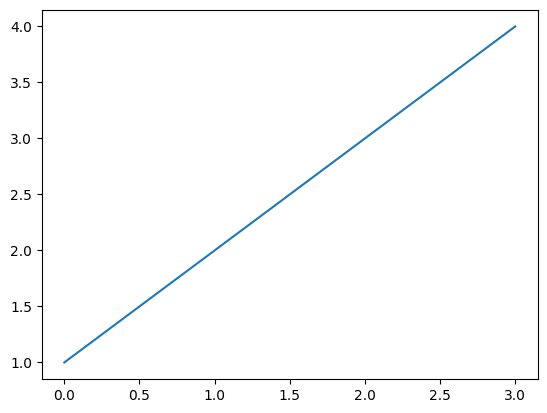

In [63]:
import matplotlib.pyplot as plt
print("Matplotlib instalado correctamente")
plt.plot([1, 2, 3, 4])
plt.show()

In [64]:
corr_data.style.background_gradient(cmap=plt.get_cmap('RdYlGn'), axis=1)

,mpg,cilindros,desplazamiento,potencia,peso,aceleracion
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289
cilindros,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419
desplazamiento,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684
potencia,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
peso,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457
aceleracion,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000


In [65]:
# correlación más negativa
mpg_data.drop(['año','origen'],axis=1).corr(numeric_only=True).idxmin()

mpg                   peso
cilindros              mpg
desplazamiento         mpg
potencia               mpg
peso                   mpg
aceleracion       potencia
dtype: object

In [66]:
# correlación más positiva
mpg_data.drop(['año','origen'],axis=1).corr(numeric_only=True).idxmax()  #consigo misma....

mpg                          mpg
cilindros              cilindros
desplazamiento    desplazamiento
potencia                potencia
peso                        peso
aceleracion          aceleracion
dtype: object

In [67]:
# tabla similar con las correlaciones más positivas (evitar parejas del mismo valor)
positive_corr = mpg_data.drop(['año','origen'],axis=1).corr(numeric_only=True)
np.fill_diagonal(positive_corr.values, 0)
display(positive_corr)
positive_corr.idxmax()

,mpg,cilindros,desplazamiento,potencia,peso,aceleracion
mpg,0.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289
cilindros,-0.775396,0.000000,0.950721,0.842983,0.896017,-0.505419
desplazamiento,-0.804203,0.950721,0.000000,0.897257,0.932824,-0.543684
potencia,-0.778427,0.842983,0.897257,0.000000,0.864538,-0.689196
peso,-0.831741,0.896017,0.932824,0.864538,0.000000,-0.417457
aceleracion,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,0.000000


mpg                  aceleracion
cilindros         desplazamiento
desplazamiento         cilindros
potencia          desplazamiento
peso              desplazamiento
aceleracion                  mpg
dtype: object

In [68]:
positive_corr.style.background_gradient(cmap=plt.get_cmap('RdYlGn'), axis=1, vmin=-1.0, vmax=1.0)

,mpg,cilindros,desplazamiento,potencia,peso,aceleracion
mpg,0.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289
cilindros,-0.775396,0.000000,0.950721,0.842983,0.896017,-0.505419
desplazamiento,-0.804203,0.950721,0.000000,0.897257,0.932824,-0.543684
potencia,-0.778427,0.842983,0.897257,0.000000,0.864538,-0.689196
peso,-0.831741,0.896017,0.932824,0.864538,0.000000,-0.417457
aceleracion,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,0.000000
